<a href="https://colab.research.google.com/github/pranjalm27/Boston-House-Price-Linear-Regression-Analysis/blob/main/Boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Project: Boston House Price Prediction

## Objective
The project is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, I will identify the most important features affecting the price of the house. I will employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

#Dataset
Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric Oxide concentration (parts per 10 million)

RM: The average number of rooms per dwelling

AGE: Proportion of owner-occupied units built before 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per 10,000 dollars

PTRATIO: Pupil-teacher ratio by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in 1000 dollars

##Importing the necessary libraries and overview of the dataset

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# preparing data
from sklearn.model_selection import train_test_split

#  data preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [6]:
df = pd.read_csv("/content/Boston.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Observation:
The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

##Checking the info of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Observations:

There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.
There are 13 columns in the dataset and every column is of numeric data type.


# Exploratory Data Analysis and Data Preprocessing

## Summary Statistics of this Dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Observations:

The mean crime rate per capita by town is 3.61 and over half of areas have very low crime rate, which is less than 0.5.
around 11% of residential land is zoned for lots over 25,000 sq.ft and around 11% of lands is non-retail business
Majority of properties do not bound Charles river.
In each property the average rooms is 6.24, and it ranges from 3.56 to 8.78
Most properties in the dataset are old, since 68% of them are built before 1940.
The weighted distance to five business centers is 3.79 miles but it has a big range, from 2.1 to 12.13.
The value of properties range from 5 to 50 thousands of dollars, which is a wide range. The mean is 22.53, and the 75% is 25, so only a small portion of properties are expensive.

# Univariate Analysis

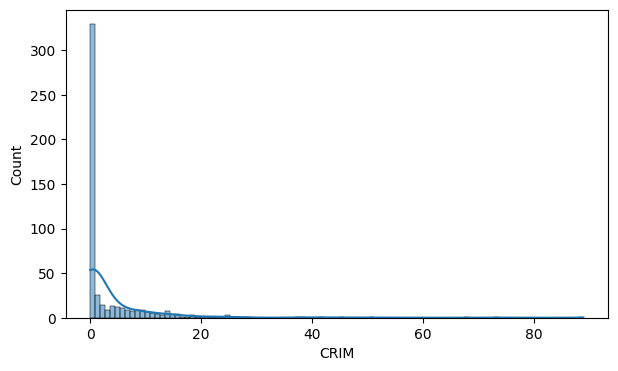

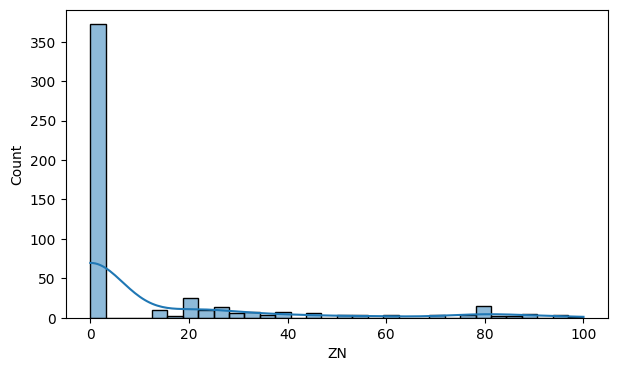

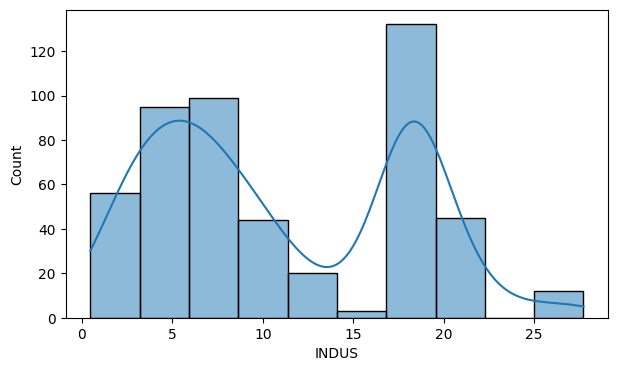

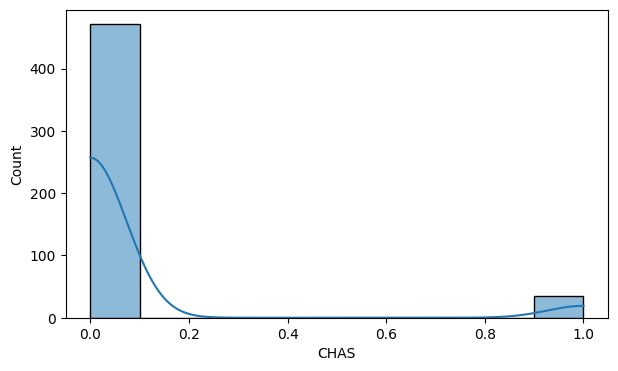

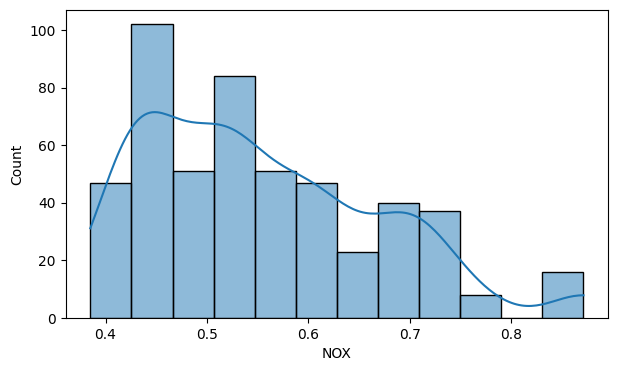

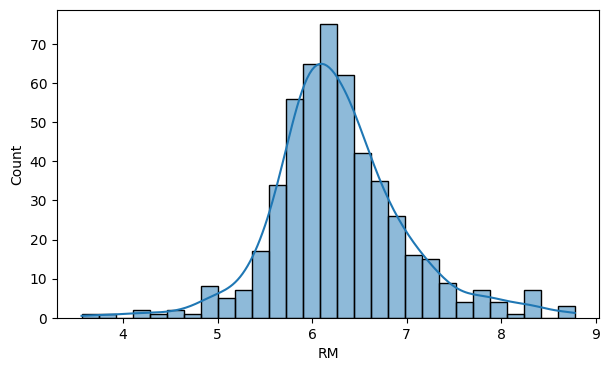

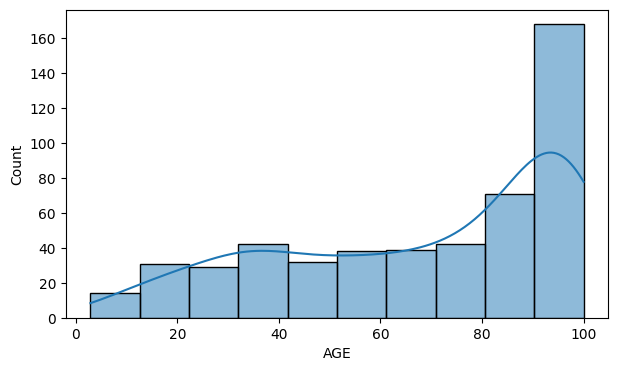

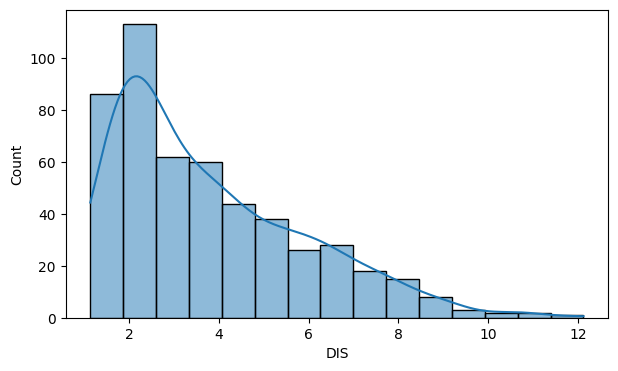

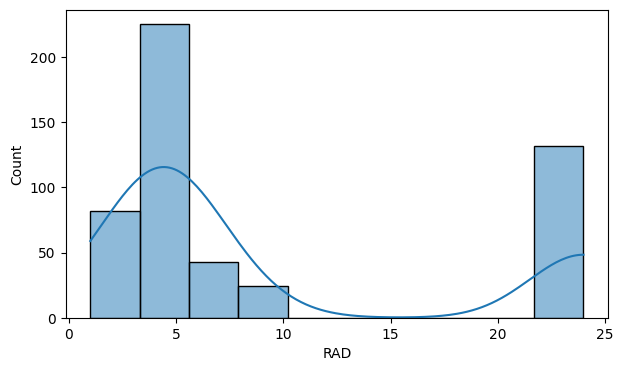

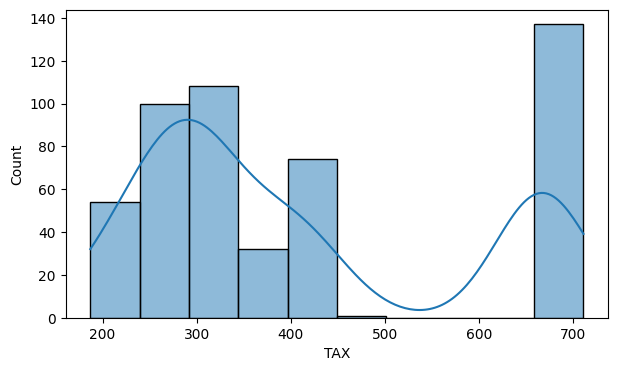

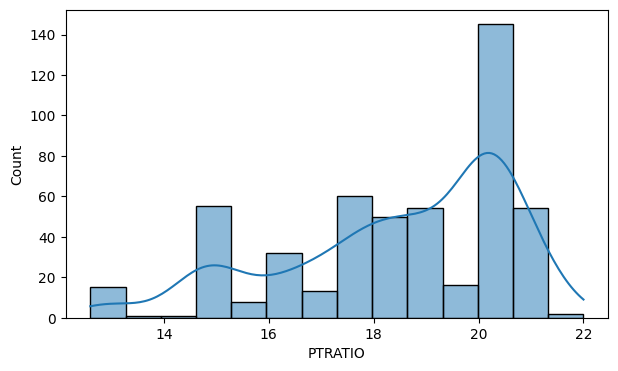

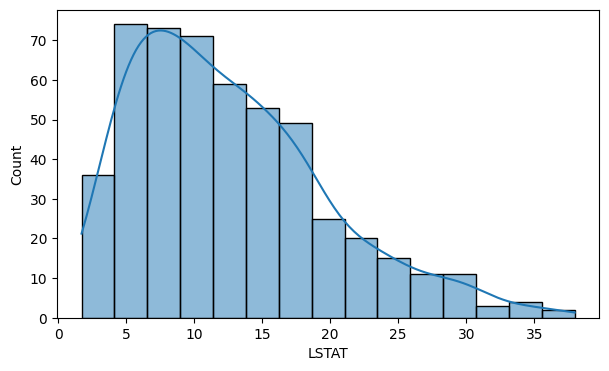

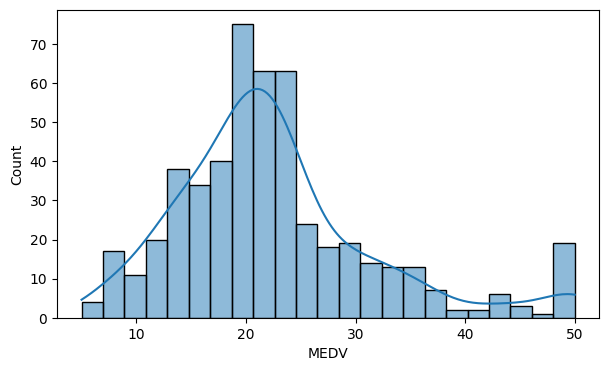

In [9]:
# look at their distributions
for i in df.columns:

    plt.figure(figsize = (7, 4))

    sns.histplot(data = df, x = i, kde = True)

    plt.show()

###Observations:

The average number of rooms per dwelling and Median value of owner-occupied homes in 1000 dollars are approcahing normal distribution
Per capita crime rate by town, Proportion of residential land zoned for lots over 25,000 sq.ft., whether the property bunds Charles River, and Weighted distances to five Boston employment centers are left skewed, which means the majoriry of data clusters in the low values.
Age is right skewed, so that the majority of properties are built before 1940.
As the dependent variable is sightly skewed, we will apply a log transformation on the 'MEDV' column and check the distribution of the transformed column.

As the dependent variable is sightly skewed, we will apply a log transformation on the 'MEDV' column and check the distribution of the transformed column.

In [10]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

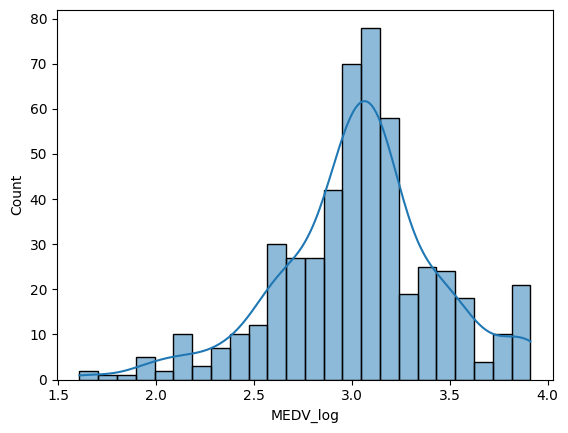

In [11]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

###Observation:

The log-transformed variable (MEDV_log) appears to have a nearly normal distribution without skew, and hence we can proceed.
Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

# Bivariate Analysis

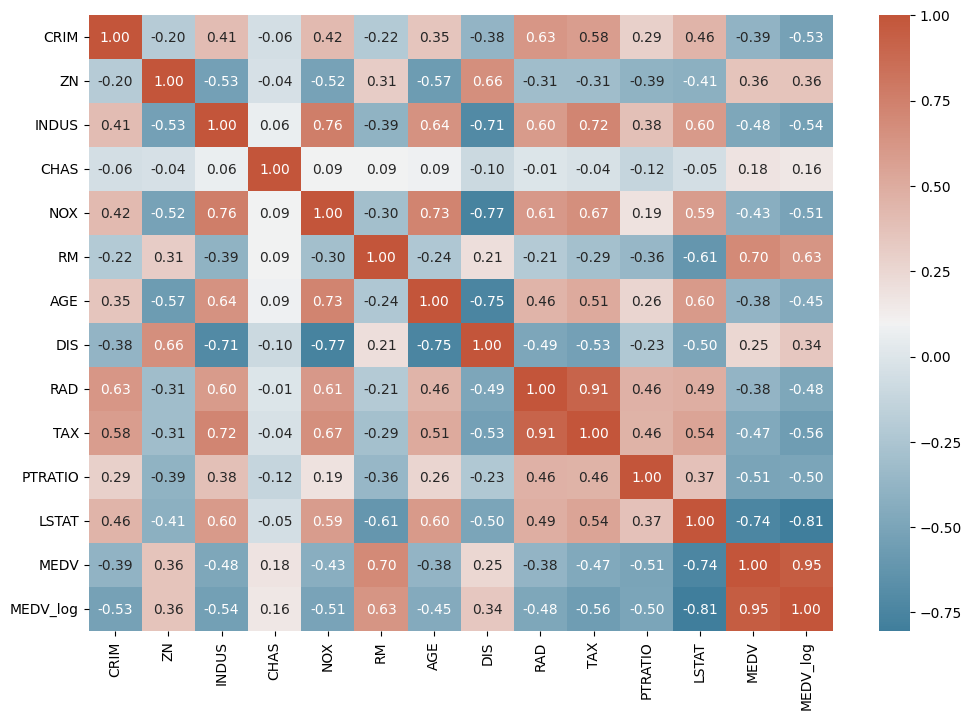

In [12]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

###Observations:
(summarizing correlation over 70%)

Property tax is highly correlated with accessibility and proportion of non-retail business acres per town.
Nitric Oxide concentration is highly correlated with proportion of non-retail business acres per town and distances to employment centers, and it makes sense because industries will lead to high Nitric Oxide concentration, and the further from business centers, the lower concentration of Nitric Oxide.
Age and distance to business centers are negatively highly correlated, meaning that older properties are built further away from business centers.
Number of rooms are positively correlated with housing price, meaning more rooms will bring up the property value.
Percentage of lower status of the population is negatively correlated with housing price, meaning that the existence of low income will make the property cheaper.

## Visualization
Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

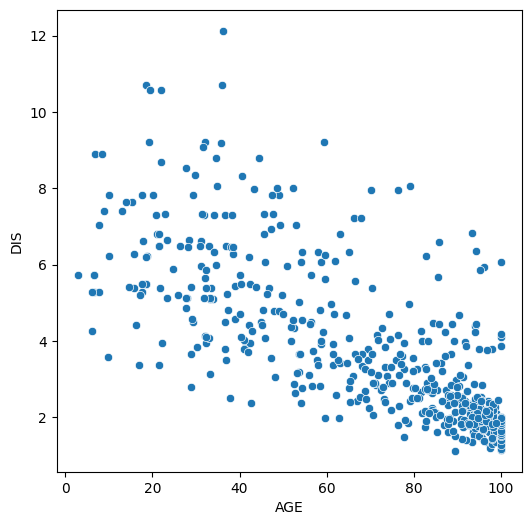

In [13]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

### Observations:

The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

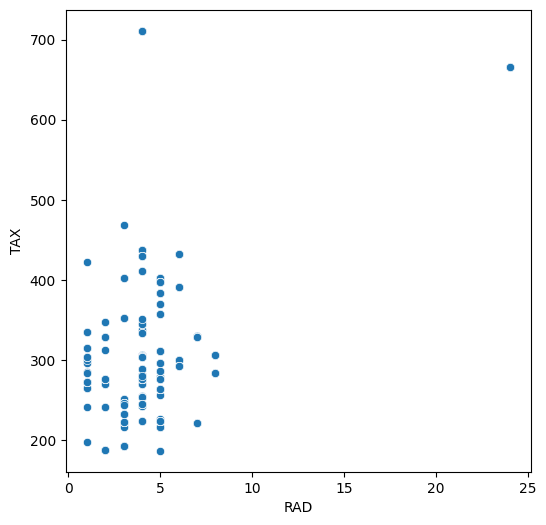

In [14]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

### Observations:

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
The strong correlation might be due to outliers.
Let's check the correlation after removing the outliers.

In [15]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


### Observation:

So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

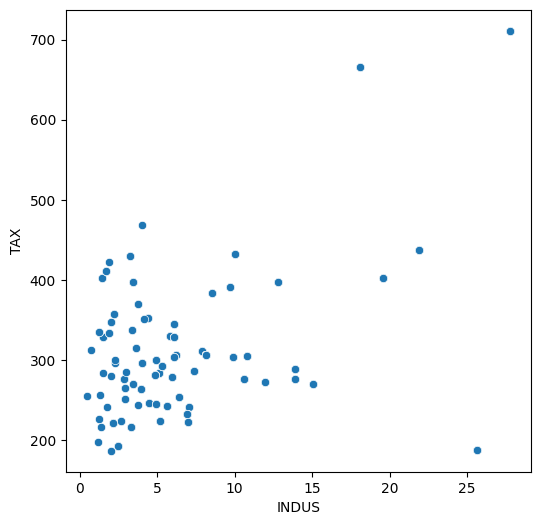

In [16]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

### Observations:

The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

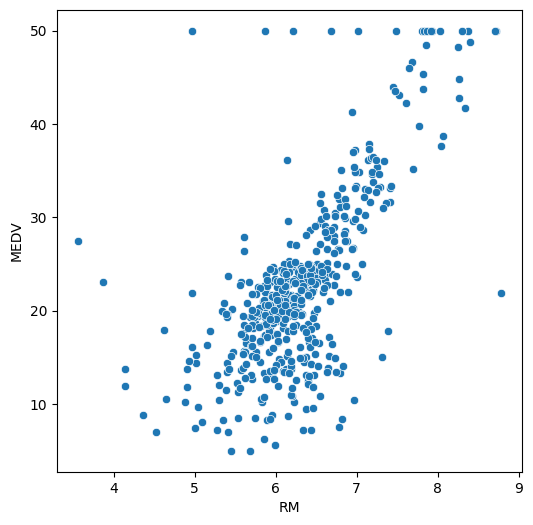

In [17]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

### Observations:

The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

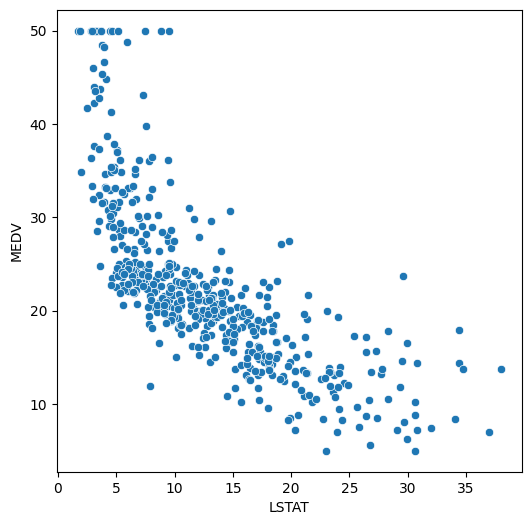

In [18]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

### Observations:

The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
There are few outliers and the data seems to be capped at 50.

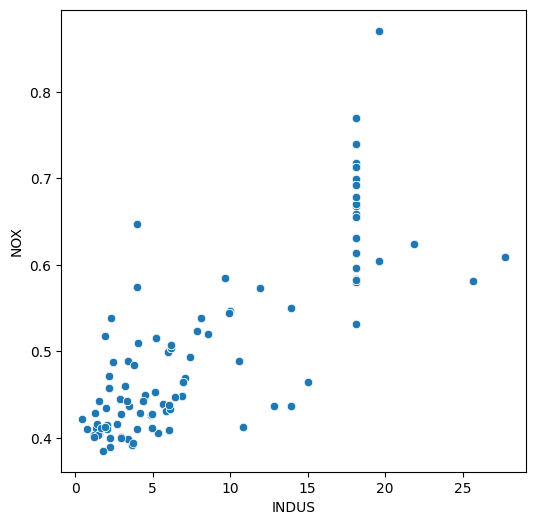

In [19]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)


plt.show()

### Observations:
It makes sense that Nitric Oxide concentration increases with the amount of non-retail of business acreas increases since they will consume energy and emit Nitric Oxides.

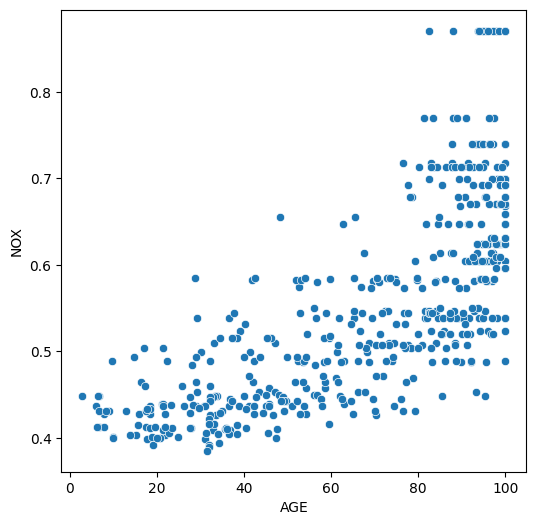

In [20]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

### Observations:
The older the properties are, the higher Nitric Oxide concentration there will be. It is probably because old houses have older heating systems, which will consumer more energy.

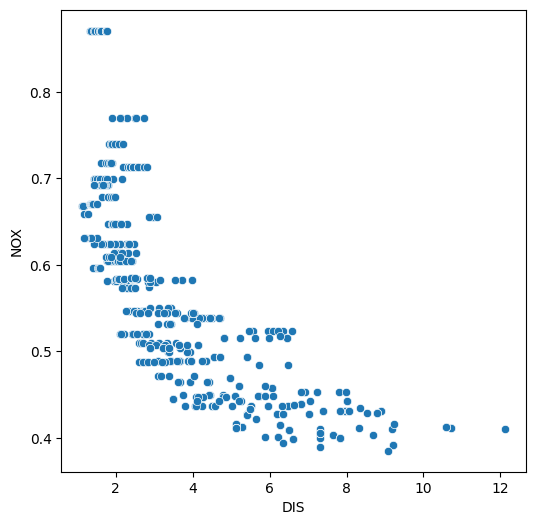

In [21]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

### Observations:
Nitric Oxide concentration is decreasing when the Distance from the business center is increasing, and it is because the suburban areas have fewer cars.

The variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model.

# Split the dataset

In [22]:
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Check for Multicollinearity
I use the Variance Inflation Factor (VIF) to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


### Observations:

There are two variables with a high VIF - RAD and TAX (greater than 5).
I will remove TAX as it has the highest VIF values and check the multicollinearity again.

In [25]:
X_train = X_train.drop(columns =['TAX'])

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, I will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

# Linear Regression model

In [26]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          1.40e-101
Time:                        19:02:48   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations:

Crime rate, bound to Charles river, distance to business centers, Nitric Oxide concentration, room numbers, accessibility to radial highways, Pupil-teacher ratio and percentage of lower status of the population are all significantly impacting the housing price.

Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.

### Examining the significance of the model
From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [27]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(columns=['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' ]) # Write your code here

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

model2 = sm.OLS(y_train, X_train).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          2.61e-104
Time:                        19:04:17   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking linear regression assumptions


1.   Mean of residuals should be 0
2.   No Heteroscedasticity
3. Linearity of variables
4. Normality of error terms

## 1. Check for mean residuals

In [28]:
residuals = model2.resid

np.mean(residuals)

-2.5303049047106675e-15

###Observations:

the first assumption is satisfied since the mean of residuals are approaching zero.

## 2. Check for homoscedasticity

In [29]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [30]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(residuals, X_train)

lzip(name, test)

[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067668275)]

###Observations:

we reject it's null hypothesis that error terms are homoscedastic. It means that the residuals are not symmetrically distributed across the regression line.

## 3. Linearity of variables

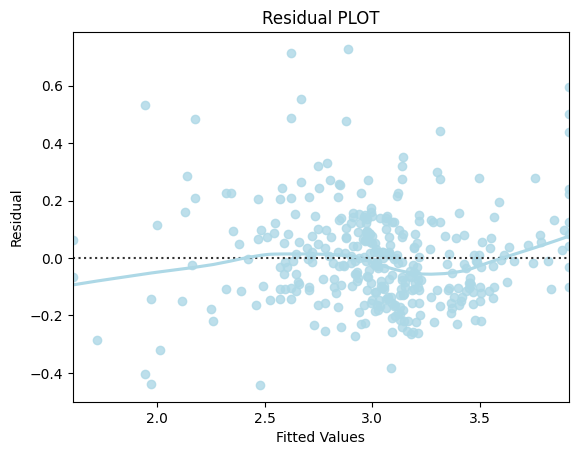

In [31]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = y_train, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

###Observations:

From the plot we can see that the residual is randomly and uniformly scarttered on the x axis.

## 4. Normality of error terms
The residuals should be normally distributed.

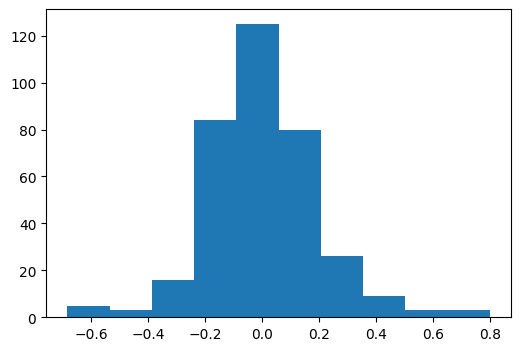

In [32]:
# Plot histogram of residuals
fig, ax = plt.subplots(figsize =(6, 4))
ax.hist(residuals)
plt.show()

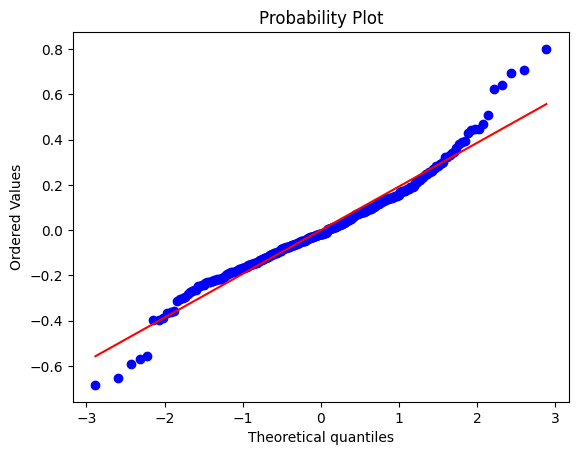

In [33]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

###Observations:

The result satisfies the last assumption since the residuals are normally distributed.

#Evaluate Model Performance

Check the performance of the model on the train and test data set

In [35]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


###Observations:

The RMSE is 0.198 on test data, which is almost similar to the RMSE on the training dataset. It seems like that our model is just right fit.

Apply cross validation to improve the model and evaluate it using different evaluation metrics


In [36]:
from sklearn.model_selection import cross_val_score


linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [37]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In [38]:
Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT + 